### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?

Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Rename notebook with your group number and submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged.

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- There is a high possibility that your classmate has also faced the same problem and knows the solution. So this is an effort to encourage collaborative learning, reducing mails for frequently asked queries and also making all the information available to everyone.
- Please check existing threads for your query before creating a new one. It goes without saying that do not share your code or complete solutions there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

### Instructions given in class: (11/07)
Steps to be followed:
1. read csv files
2. explore dataset
3. evaluation 
4. split 
5. scale
6. model
-GridSearchCV - best parameters
-train, test score

Proj 3 (If you need head start):
7. ensemble
8. dimension reduction - repeat step 4 to 7
9. Deep learning

In [3]:
%matplotlib notebook
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##  Dataset For Regression Task
  
Following steps were taken to read and explore the dataset which we are going to use in this Project.

In [4]:
Dataset = pd.read_csv('Twitter.data', header = None)  #Reading Regression Dataset

In [80]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583250 entries, 0 to 583249
Data columns (total 78 columns):
0     583250 non-null int64
1     583250 non-null int64
2     583250 non-null int64
3     583250 non-null int64
4     583250 non-null int64
5     583250 non-null int64
6     583250 non-null int64
7     583250 non-null int64
8     583250 non-null int64
9     583250 non-null int64
10    583250 non-null int64
11    583250 non-null int64
12    583250 non-null int64
13    583250 non-null int64
14    583250 non-null float64
15    583250 non-null float64
16    583250 non-null float64
17    583250 non-null float64
18    583250 non-null float64
19    583250 non-null float64
20    583250 non-null float64
21    583250 non-null float64
22    583250 non-null float64
23    583250 non-null float64
24    583250 non-null float64
25    583250 non-null float64
26    583250 non-null float64
27    583250 non-null float64
28    583250 non-null int64
29    583250 non-null int64
30    583250 non-null

In [81]:
Dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5


In [82]:
#Dataset.columns
Dataset[77].unique().astype(int)  #This is Dependent variable

array([   0,    0,    2, ..., 4960, 4618, 2129])

In [8]:
Dataset[77].value_counts()     #Count of rows with unique values

0.5        20770
1.0        19299
0.0        19094
1.5        17510
2.0        15254
2.5        13557
3.0        11920
3.5        10781
4.0         9594
4.5         8609
5.0         7926
5.5         7422
6.0         6760
6.5         6294
7.0         5888
7.5         5433
8.0         5273
8.5         4971
9.0         4692
9.5         4614
10.0        4287
10.5        4025
11.0        3956
11.5        3816
12.0        3713
12.5        3643
13.0        3457
13.5        3315
14.0        3275
14.5        3215
           ...  
3623.0         1
3584.5         1
14486.0        1
3621.0         1
3618.0         1
3617.0         1
14463.5        1
3614.5         1
3613.0         1
3611.5         1
4498.0         1
14427.5        1
9324.0         1
6791.0         1
3603.5         1
4500.0         1
3602.5         1
3599.5         1
3599.0         1
3597.0         1
6290.0         1
3593.0         1
3591.0         1
6798.5         1
3589.0         1
2834.0         1
3587.5         1
3150.0        

<IPython.core.display.Javascript object>


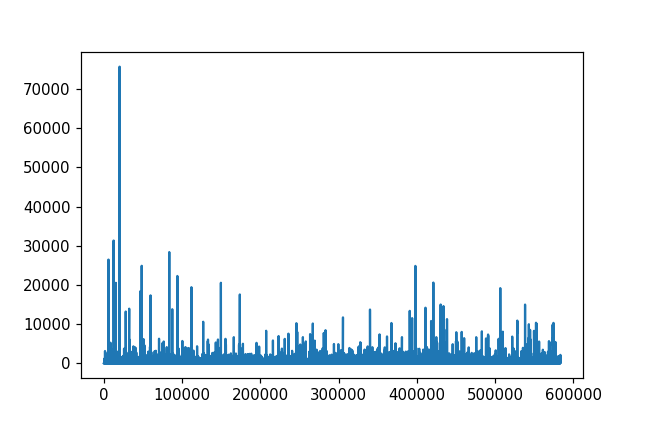

In [83]:
plt.plot(Dataset[77])

<IPython.core.display.Javascript object>


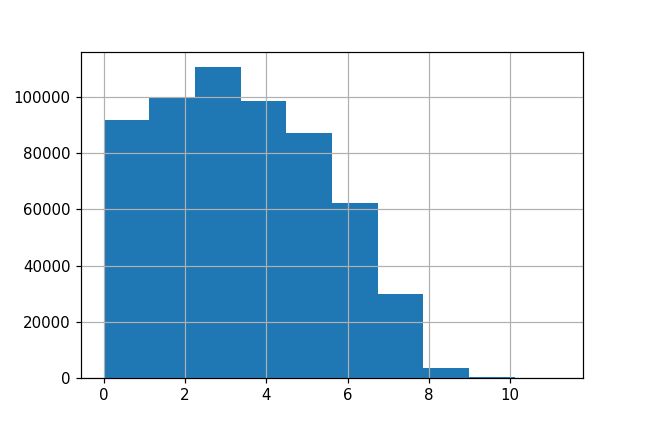

In [84]:
#Trying to understand distribution of dependent variable
np.log(Dataset[77]+1).hist()   #transforming to log and adding 1 to avoid -Inf
plt.show()

In [85]:
Dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,...,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,...,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,...,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091296,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


In [86]:
#Dataset.isnull().values.any()    #No Missing values
Dataset.isnull().sum().sum()  

0

The dataset does not have any missing values. Thus, no treatment is needed.  
We have plotted correlation between variables below:

In [9]:
corr = Dataset.corr()    #calculate correlation matrix

<IPython.core.display.Javascript object>


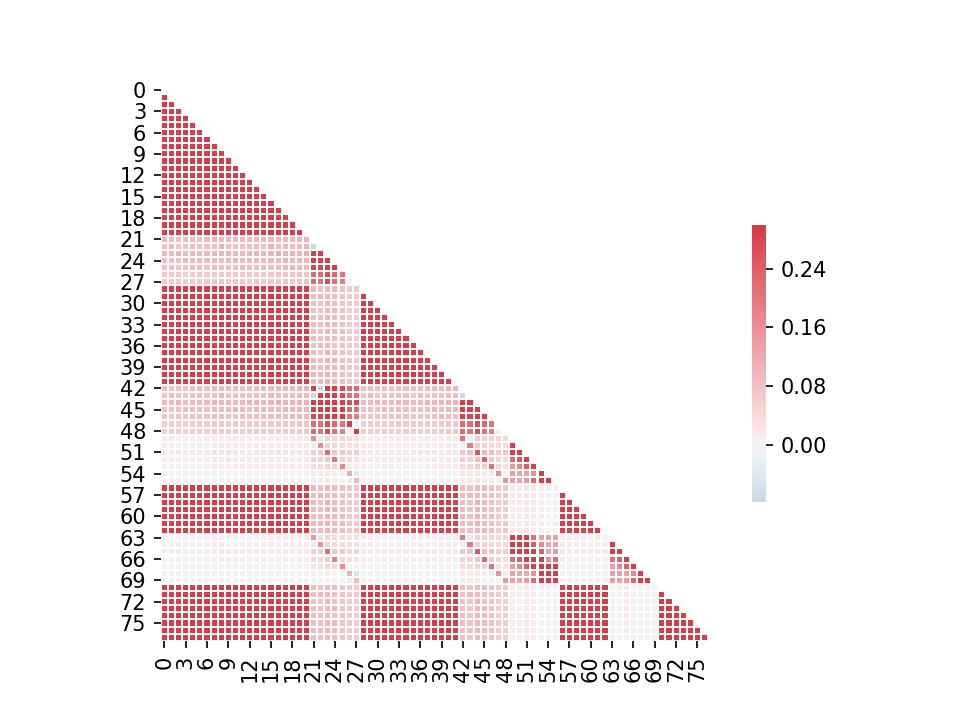

In [11]:
#Developing correlation plot

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [77]:
#Reading .names file
file = open("Twitter.names", "r")
for aline in file:
    #items = aline.split()
    print(aline)

1. Title of Database: Buzz prediction on Twitter





2. Sources:

   -- Creators : 

        FranÃ§ois Kawala (1,2) and 

        Ahlame Douzal (1) and 

        Eric Gaussier (1) and

        Eustache Diemert (2)



   -- Institutions : 

        (1) UniversitÃ© Joseph Fourier (Grenoble I)

            Laboratoire d'informatique de Grenoble (LIG)

        (2) BestofMedia Group



   -- Donor: BestofMedia (ediemert@bestofmedia.com)

   -- Date: May, 2013





3. Past Usage:

   -- References : 

        Predicting Buzz Magnitude in Social Media (in submission (ECML-PKDD 13))



   -- Predicted attribute : 

         Mean Number of active discussion (NAD). This attribute is a positive integer 

         that describe the popularity of the instance's topic. It is stored is 

         the rightmost column.



   -- Study results : 

        The results achieved are acceptable, nevertheless the unbalanced nature

        of this dataset leaves some room for improvement. The data may be sc

### Taking a random sample and Pre-process data
We take 10% random sample of dataset to try all the models and decide which model is the best.  
We will use that model for training the entire dataset then.

In [26]:
subData = Dataset.sample(frac=0.1, random_state = 0)    #Selecting a random sample of data

In [27]:
subData.shape

(58325, 78)

In [28]:
#Separating dependent and independent vars
X = pd.DataFrame(subData.iloc[:,0:77])
Y = subData[77]

We will use MinMaxScaler to transform all the values in the dataset to range between 0 and 1. That way, it will be standardized. 

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,Y, random_state = 0)

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_org)
X_test_scaled = scaler.transform(X_test_org)
X_train =  pd.DataFrame(X_train_scaled)
X_test = pd.DataFrame(X_test_scaled)

### K Nearest Regressor

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

params = {'n_neighbors':[2,3,4,5,6,7,8]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 4}

We get n_neighbors = 4 from the GridSearch.   
Thus, we will train using n_neighbors = 4, which should be optimal.

In [34]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(4)
knn_reg.fit(X_train, y_train)
knn_train_score = knn_reg.score(X_train, y_train)
knn_test_score = knn_reg.score(X_test, y_test)

print(knn_train_score)
print(knn_test_score)


0.9502728099335964
0.9336116181369742


In [36]:
report_table_1 = ['knn', 'n_neighbors = 4', knn_train_score, knn_test_score]

### Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print("Training R^2:", lreg.score(X_train, y_train))
print("Testing R^2:", lreg.score(X_test, y_test))

Score = cross_val_score(lreg, X_train, y_train)
print("Cross Validation Scores:", Score)

Training R^2: 0.9605233015179824
Testing R^2: 0.9543604976065105
Cross Validation Scores: [0.9543462  0.95941212 0.95522252]


In [43]:
report_table_2 = ['Linear Regression', 'Simple', lreg.score(X_train, y_train), lreg.score(X_test, y_test)]

### Polynomial Regression

I have fitted second order polynomial regression. Third order polynomial wasn't fitting even on a smaller dataset.

In [44]:
from  sklearn.preprocessing  import PolynomialFeatures

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg.fit(X_train_poly, y_train)
poly_train_score = (lreg.score(X_train_poly, y_train))
poly_test_score = (lreg.score(X_test_poly, y_test))
    
print(poly_train_score)
print(poly_test_score)


0.9831302634193698
0.0277068238736512


**From the above test score we can infer that the Polynomial Regression model is overfitting.**

In [46]:
report_table_3 = ['Polynomial Regression', 'Order = 2', poly_train_score, poly_test_score]

### RIDGE Regression

In [47]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

In [49]:
print("Training Score:", train_score_list)
print("Testing Score:", test_score_list)

Training Score: [0.9601913383453053, 0.9598676131183407, 0.9566996987556929, 0.9354317544171002, 0.8780316853348806]
Testing Score: [0.9544625858412362, 0.9535175021449984, 0.9498840739215438, 0.9396666775782121, 0.903172549315234]


**We can notice that the accuracy reduces as the alpha increases.**   
We will plot these values for better understanding.

<IPython.core.display.Javascript object>


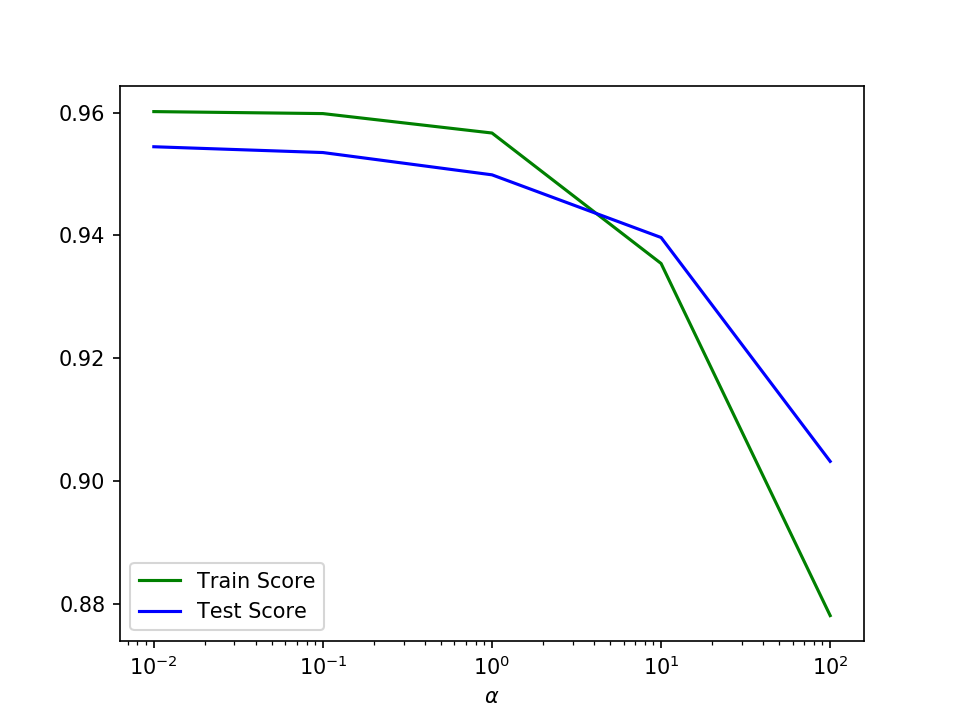

Text(0.5,0,'$\\alpha$')

In [50]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

We will use the optimum value of alpha to design the model, alpha value is 0.01 obtained from above graph.

In [51]:
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.9602
Test score: 0.9545


In [52]:
report_table_4 = ['Ridge Regression', 'Alpha = 0.01', ridge.score(X_train, y_train), ridge.score(X_test, y_test)]

We plot the Coefficients of the ridge regression below:

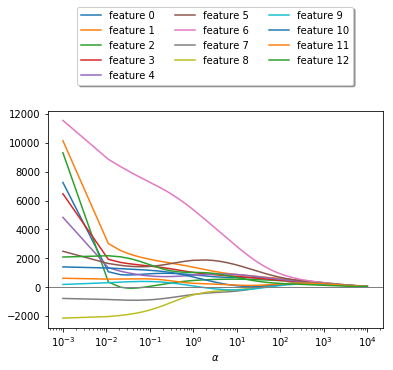

In [53]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()


### LASSO Regression

In [55]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha, max_iter = 30000)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

I increased the max iterations in the above model as it was giving convergence warning.

In [56]:
print("Training Score:", train_score_list)
print("Testing Score:", test_score_list)

Training Score: [0.9596167126500394, 0.9532111054670308, 0.9353340267284557, 0.5805546005450664]
Testing Score: [0.9536621115113779, 0.95105667295716, 0.9320058806122609, 0.6246270187387353]


**Similar to ridge, We can notice that the accuracy reduces as the alpha increases.**   
We will plot these values for better understanding.

Text(0.5,0,'$\\alpha$')

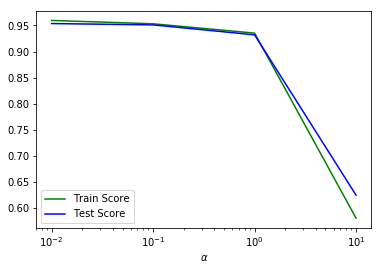

In [57]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

We will use the optimum value of alpha to design the model, alpha value is 0.01 obtained from above graph.

In [58]:
lasso = Lasso(alpha = 0.01, max_iter=30000)
lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

Train score: 0.9596
Test score: 0.9537


In [59]:
report_table_5 = ['Lasso Regression', 'Alpha = 0.01', lasso.score(X_train, y_train), lasso.score(X_test, y_test)]

### Support Vector Regression

In [14]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf','poly'), 'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = svm.SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(X_train, y_train)
print(clf.best_params_)


{'epsilon': 0.5, 'gamma': 1e-07, 'kernel': 'linear'}


We will use the optimum parameters obtained from the Gridsearch as above to train the model.

In [60]:
clf = svm.SVR(kernel='linear', gamma=1e-07, epsilon=0.5)
clf.fit(X_train, y_train)
svr_train_score = clf.score(X_train, y_train)
svr_test_score = clf.score(X_test, y_test)
print(svr_train_score, svr_test_score)

0.6905860244119069 0.7382286391320088


In [62]:
report_table_6 = ['Support Vector Regression', 'Linear Kernel, gamma = 1e-07, epsilon = 0.5', svr_train_score, svr_test_score]

### SGD Regressor

In [16]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

sgd_reg = SGDRegressor(random_state= 0)

param_grid = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal'],
}

clf = GridSearchCV(sgd_reg, param_grid)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

{'alpha': 1e-06, 'learning_rate': 'constant', 'loss': 'squared_loss', 'penalty': 'l1'}
0.8801184390865069


In [64]:
sgd_reg = SGDRegressor(random_state= 0, alpha = 1e-06, max_iter = 3000, learning_rate = 'constant', loss = 'squared_loss', penalty = 'l1')
sgd_reg.fit(X_train, y_train)
sgd_train_score = sgd_reg.score(X_train, y_train)
sgd_test_score = sgd_reg.score(X_test, y_test)
print(sgd_train_score)
print(sgd_test_score)

0.9573269112132466
0.9514598805288702


In [66]:
report_table_7 = ['SGD Regressor', 'squared_loss, alpha = 1e-06', sgd_train_score, sgd_test_score]

### Generating a Report table
For comparing all the models, we will create a table and a plot.

In [67]:
report_table = pd.DataFrame(list(zip(report_table_1,
             report_table_2,
             report_table_3,
             report_table_4,
             report_table_5,
             report_table_6,
             report_table_7))).transpose()

In [68]:
report_table.columns = ['Model', 'Model Parameter', 'Train Score', 'Test Score']

In [69]:
report_table

,Model,Model Parameter,Train Score,Test Score
0,knn,n_neighbors = 4,0.950273,0.933612
1,Linear Regression,Simple,0.960523,0.95436
2,Polynomial Regression,Order = 2,0.98313,0.0277068
3,Ridge Regression,Alpha = 0.01,0.960191,0.954463
4,Lasso Regression,Alpha = 0.01,0.959617,0.953662
5,Support Vector Regression,"Linear Kernel, gamma = 1e-07, epsilon = 0.5",0.690586,0.738229
6,SGD Regressor,"squared_loss, alpha = 1e-06",0.957327,0.95146


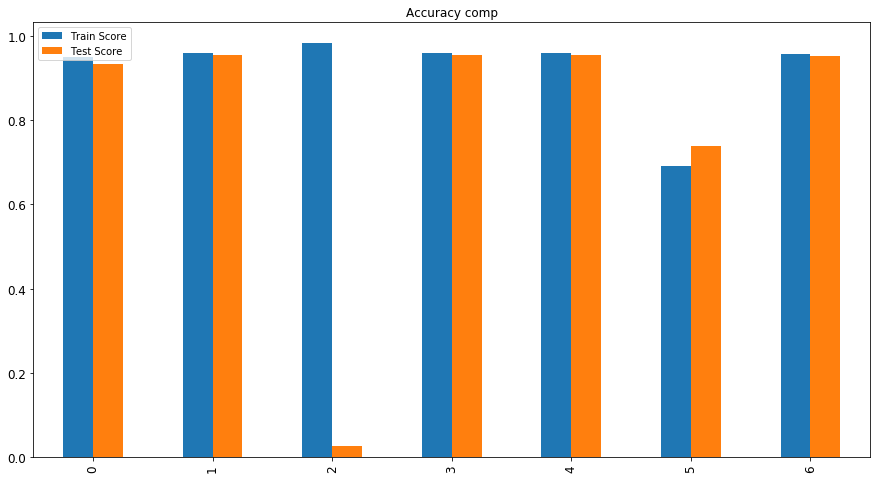

In [74]:
ax = report_table[['Train Score','Test Score']].plot(kind='bar', title ="Accuracy comp", figsize=(15, 8), legend=True, fontsize=12)
plt.show()

**From the above chart and accuracy values, We will choose Ridge regression as the model to train the whole dataset.**
## Final Model
### Training the whole dataset using Ridge Regression
We will separate the train and test data and perform initial transformation and pre-processing.

In [72]:
#Separating dependent and independent vars of the whole Dataset
X = pd.DataFrame(Dataset.iloc[:,0:77])
Y = Dataset[77]

In [73]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,Y, random_state = 0)

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_org)
X_test_scaled = scaler.transform(X_test_org)
X_train =  pd.DataFrame(X_train_scaled)
X_test = pd.DataFrame(X_test_scaled)

**After applying the transformation, we will apply Ridge regression on the whole data and predict values for y_test.**

In [80]:
from  sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt

ridge = Ridge(alpha = 0.01)
ridge.fit(X_train,y_train)

#Predicting values for the test dataset
predict = ridge.predict(X_test)

#Calulate RMSE Value
rmse = sqrt(mean_squared_error(y_test, predict))

print('RMSE:', rmse)
print('Train score: {:.4f}'.format(ridge.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

RMSE: 142.01637950337982
Train score: 0.9330
Test score: 0.9433


**We obtained Training accuracy of 93.3% and Testing accuracy of 94.3% on the whole dataset using Ridge regression.**  
**We Predicted values for Y_test and obtained RMSE of 142.01.**


##  Dataset For Classification Task
*Classification analysis is in another Kernel*

In [65]:
#Generate a beep to notify when code finishes running
import winsound
duration = 1800  # millisecond
freq = 440  # Hz
winsound.Beep(freq, duration)

In [ ]:
#Dataset_2 = pd.read_csv('Twitter-Absolute-Sigma-500.data', header = None)   #Reading Data For classification

In [ ]:
#Dataset_2.info()

In [ ]:
#Dataset_2.head()

In [ ]:
#Dataset.columns
#Dataset_2[77].unique().astype(int)   #Dependent variable

In [ ]:
#Dataset_2.isnull().sum().sum()    #No Missing values